### Gibbs Sampling
We use Gibbs sampling when we are unable to sample directly from multivariate distribution consisted of two or more univariate distributions, but we can do sampling from various (in this case two) conditional distributions. The point of Gibbs sampling is that given a multivariate distribution it is simpler to sample from a conditional distribution than to marginalize by integrating over a joint distribution.
Code is from blog: https://towardsdatascience.com/gibbs-sampling-8e4844560ae5 but with some additions and clarifications.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [16]:
f = lambda x, y: np.exp(-(x**2*y**2+x*x+y*y-8*x-8*y)/2.) # Suppose we had the following posterior and conditional probability distributions

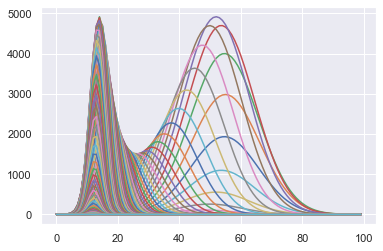

In [17]:
xx = np.linspace(-1, 8, 100)
yy = np.linspace(-1, 8, 100)
xg,yg = np.meshgrid(xx, yy)
z = f(xg.ravel(), yg.ravel()) # returns flatten array
z2 = z.reshape(xg.shape)
plt.plot(z2); # we have created artificial joint distribution


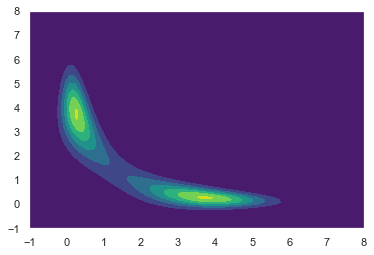

In [18]:
plt.contourf(xg, yg, z2, cmap='viridis');

In [28]:
# now we will create functions from sampling from marginal distributions
sig = lambda z, i: np.sqrt(1./(1.+z[i]*z[i])) #formulas for calculating p(x|y) and p(y|x) for function defined above
mu = lambda z, i: 4./(1.+z[i]*z[i])

In [59]:
N = 50000
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = 1.
y[0] = 6.
sig = lambda z, i: np.sqrt(1./(1.+z[i]*z[i]))
mu = lambda z, i: 4./(1.+z[i]*z[i])

In [63]:
# Now we will run sampling algorithm
for i in range(1, N, 2):
    sig_x = sig(y, i-1) 
#     print(f'sig_x_{sig_x}, i: {i}')
    mu_x = mu(y, i-1)
    x[i] = np.random.normal(mu_x, sig_x) # we sample x based on y
    y[i] = y[i-1] 
#     print(f'x[i]: {x[i]}')
#     print(f'y[i]: {y[i]}')
#     print(f'mu_x: {mu_x}')
    
    sig_y = sig(x, i)
    mu_y = mu(x, i)
    y[i+1] = np.random.normal(mu_y, sig_y) #we sample y[i+1] based on previous sampled x
    x[i+1] = x[i]
#     print(f'mu_y: {mu_y}  sig_y: {sig_y}')
#     print(f' x[i]: {x[i]}')
#     print(40*'==')

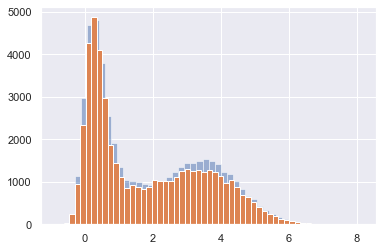

In [53]:
plt.hist(x, bins=50, alpha = 0.5);
plt.hist(y, bins=50);

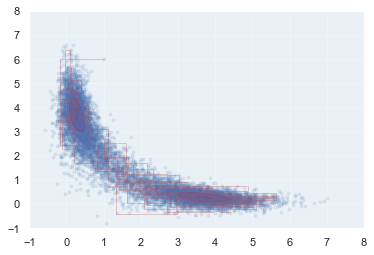

In [56]:
plt.contourf(xg, yg, z2, alpha=0.8, cmap='BuPu')
plt.plot(x[::10],y[::10], '.', alpha=0.1)
plt.plot(x[:300],y[:300], c='r', alpha=0.3, lw=1); # we succeded to approximate previously created artificial distribution